This notebook will detail how the number of consecutive trials required to see
* 1) *N* of *N* target echoes varies. 
* 2) median of *N* target echoes present

In [1]:
import copy
import os
import matplotlib.pyplot as plt
import numpy as np 
import pickle
from calc_num_IPIs import calc_num_IPIs_to_hear_echoes as nIPIs_to_mechoes
from calc_num_IPIs import calc_numtrials_per_echonumber 

In [2]:
%matplotlib notebook

In [3]:
main_folder = os.path.realpath('..')
results_folder = main_folder + os.path.join('\\analytical_modelling','results','the_CPN_nIPIs_to_hear_all_echoes\\')
pkl_files = ['N_IPIS_to_hear_allechoes_mytable_windows_1to17echoes_.pkl',
            'N_IPIS_to_hear_allechoes_mytable_ubuntu_17to31.pkl']

In [4]:
results_folder+pkl_files[0]

'C:\\Users\\tbeleyur\\Google Drive\\Holger Goerlitz- IMPRS\\PHD_2015\\projects and analyses\\2016_jamming response modelling\\analytical_modelling\\results\\the_CPN_nIPIs_to_hear_all_echoes\\N_IPIS_to_hear_allechoes_mytable_windows_1to17echoes_.pkl'

#### load the pkls
with open(results_folder+pkl_files[0], 'rb') as pkl:
    data_1to15 = pickle.load(pkl)

with open(results_folder+pkl_files[1], 'rb') as pkl2:
    data_17to31 = pickle.load(pkl2)



all_data = data_1to15 + data_17to31

numtrials_perechonumber_percalldensity = map(calc_numtrials_per_echonumber, all_data)

#### get the 90 percentile of trials it took to hear all echoes:
numtrials_alldata = np.zeros((16,16))
for i, each_echonumber in  enumerate(numtrials_perechonumber_percalldensity):
    for j, calldensity in enumerate(each_echonumber.keys()):
        ninety_pctile = np.percentile(np.array(each_echonumber[calldensity]), 90)
        numtrials_alldata[i,j] = ninety_pctile

np.save('results//the_CPN_nIPIs_to_hear_all_echoes//raw_data_figures//ntrials_all_echoes', numtrials_alldata)

In [5]:
numtrials_alldata = np.load('results//the_CPN_nIPIs_to_hear_all_echoes//raw_data_figures//ntrials_all_echoes.npy')

In [166]:
numtrial_allechoes_twice = np.load('results/the_CPN_nIPIs_to_hear_all_echoes/raw_data_figures/ntrials_all_echoestwice.npy')

In [143]:
numtrials_alldata_medianechoes = np.load('results//the_CPN_nIPIs_to_hear_all_echoes//raw_data_figures//ntrials_median_echoes.npy')

In [144]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

<IPython.core.display.Javascript object>


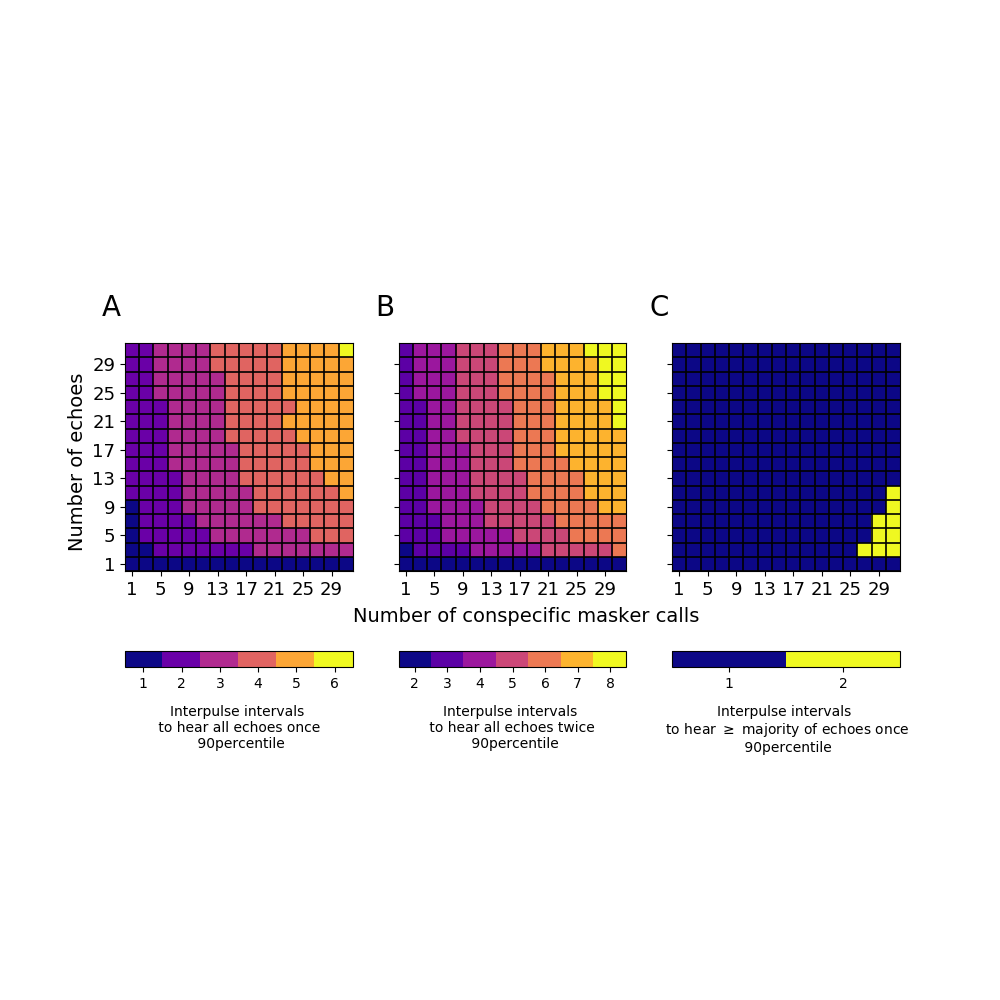

In [317]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(131)
im = ax.imshow(numtrials_alldata, aspect='equal', cmap=plt.cm.get_cmap('plasma', 6), 
                                   origin='lower',extent=[0.5,32.5,0.5,32.5])
ticks=np.arange(1,31,4)+0.5;
plt.gca().set_xticks(ticks); plt.gca().set_yticks(ticks)
plt.gca().tick_params(axis='both', which='major', labelsize=13)
ax.set_xticklabels(np.arange(1,31,4))
ax.set_yticklabels(np.arange(1,31,4))

grid_ticks = np.arange(1,33,2)
lwd = 1.2
ax.vlines(grid_ticks-0.5,0.5,32.5, linewidth=lwd)
ax.hlines(grid_ticks-0.5,0.5,32.5, linewidth=lwd)

divider = make_axes_locatable(ax)
cax = divider.new_vertical(size="7%", pad=0.8, pack_start=True)
fig.add_axes(cax)
cbar = fig.colorbar(im, cax=cax, orientation="horizontal")
cbar.set_label('Interpulse intervals \n to hear all echoes once \n 90percentile', labelpad=10,
               fontsize=10)
cbar.set_ticks(np.array(np.linspace(0.08,0.92,6, endpoint=True))*5 + 1)
cbar.set_ticklabels([1,2,3,4,5,6])
plt.text(-0.25,17.5, 'Number of echoes',
        fontsize=14, rotation=90)
plt.text(-0.1, 22, 'A', fontsize=20)

plt.show()
##################

ax1 = plt.subplot(132)

im1 = ax1.imshow(numtrial_allechoes_twice, aspect='equal', cmap=plt.cm.get_cmap('plasma', 7), 
                                   origin='lower',extent=[0.5,32.5,0.5,32.5])
ticks=np.arange(1,31,4)+0.5;
plt.gca().set_xticks(ticks); 
plt.gca().set_yticks(ticks)
plt.gca().tick_params(axis='both', which='major', labelsize=13)
ax1.set_xticklabels(np.arange(1,31,4))
ax1.set_yticklabels([])

grid_ticks = np.arange(1,33,2)
ax1.vlines(grid_ticks-0.5,0.5,32.5, linewidth=lwd)
ax1.hlines(grid_ticks-0.5,0.5,32.5, linewidth=lwd)

divider = make_axes_locatable(ax1)
cax1 = divider.new_vertical(size="7%", pad=0.8, pack_start=True)
fig.add_axes(cax1)
cbar1 = fig.colorbar(im1, cax=cax1, orientation="horizontal")
cbar1.set_label('Interpulse intervals \n to hear all echoes twice \n 90percentile',
               labelpad=10, fontsize=10)
cbar1.set_ticks(np.linspace(1/14.0, 13/14.0,7)*6 + 2 )
cbar1.set_ticklabels([2,3,4,5,6,7,8])
cbar1.update_ticks()
plt.text(-0.2, 2.8, 'Number of conspecific masker calls',
        fontsize=14)
plt.text(-0.1, 22, 'B', fontsize=20)
plt.show()

######

ax2 = plt.subplot(133)
im2 = ax2.imshow(numtrials_alldata_medianechoes, aspect='equal', cmap=plt.cm.get_cmap('plasma', 2), 
                                   origin='lower',extent=[0.5,32.5,0.5,32.5])
ticks=np.arange(1,31,4)+0.5;
plt.gca().set_xticks(ticks); 
plt.gca().set_yticks(ticks)
plt.gca().tick_params(axis='both', which='major', labelsize=13)
ax2.set_xticklabels(np.arange(1,31,4))
ax2.set_yticklabels([])

grid_ticks = np.arange(1,33,2)
ax2.vlines(grid_ticks-0.5,0.5,32.5, linewidth=lwd)
ax2.hlines(grid_ticks-0.5,0.5,32.5, linewidth=lwd)

divider = make_axes_locatable(ax2)
cax2 = divider.new_vertical(size="7%", pad=0.8, pack_start=True)
fig.add_axes(cax2)
cbar2 = fig.colorbar(im2, cax=cax2, orientation="horizontal")
cbar2.set_label('Interpulse intervals \n to hear $\geq $ majority of echoes once \n 90percentile',
               labelpad=10, fontsize=10)
cbar2.set_ticks([1.25,1.75])
cbar2.set_ticklabels([1,2])
cbar2.update_ticks()
plt.text(-0.1, 22, 'C', fontsize=20)
plt.show()


In [318]:
plt.savefig(os.path.join('plots','num_ipis_to_see_allechoes','multipanel_numipis.png'), dpi=400,pad_inches = 0, bbox_inches='tight')

#### now calculate the number of trials it takes to hear the median of all echoes
medianechoes_perechonum_percalldens = []
for each_echonum in all_data:
    num_echoes = each_echonum['num_targetechoes']
    print(num_echoes)
    median_echoes = np.median(np.arange(1,num_echoes+1))
    medianechoes_perechonum_percalldens.append(calc_numtrials_per_echonumber(each_echonum, m_echoes=median_echoes))


### get the 90 percentile of trials it took to hear MEDIAN number of echoes:
numtrials_alldata_medianechoes = np.zeros((16,16))
for i, each_echonumber in  enumerate(medianechoes_perechonum_percalldens):
    for j, calldensity in enumerate(each_echonumber.keys()):
        ninety_pctile = np.percentile(np.array(each_echonumber[calldensity]), 90)
        numtrials_alldata_medianechoes[i,j] = ninety_pctile

np.save('results//the_CPN_nIPIs_to_hear_all_echoes//raw_data_figures//ntrials_median_echoes', numtrials_alldata_medianechoes)

allechoestwice_perechonum_percalldens = []
for each_echonum in all_data:
    num_echoes = each_echonum['num_targetechoes']
    allechoestwice_perechonum_percalldens.append(calc_numtrials_per_echonumber(each_echonum, min_echoes=num_echoes,
                                                                              numtimes_allechoes=2))


### get the 90 percentile of trials it took to hear all echoes twice :
numtrials_alldata_echoestwice = np.zeros((16,16))
for i, each_echonumber in  enumerate(allechoestwice_perechonum_percalldens):
    for j, calldensity in enumerate(each_echonumber.keys()):
        ninety_pctile = np.percentile(np.array(each_echonumber[calldensity]), 90)
        numtrials_alldata_echoestwice[i,j] = ninety_pctile    